# Follow the Instructions
### - Run the first cell  
### - get down to 'START HERE'

In [1]:
import requests
import pandas as pd
import selenium
import time
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import seaborn as sns
import collections
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

# Do Not Run this! You don't need to run the Selenuim and API again because all the relevent files are in the folder
it will take you couple of days :)

In [ ]:
key='our key is a secret'
url = "http://aviation-edge.com/v2/public/flightsHistory?key="+key+"&code=tlv&type=arrival&date_from=2021-12-05&date_to=2021-12-10"



response = requests.get(url)

print(response.text)

In [ ]:
j=response.json()
df=pd.json_normalize(j)

output in to csv file 


In [ ]:
#df.to_csv('releventfile.csv',index=False)

starting selenium to get weather info

In [ ]:
import pandas as pd
df=pd.read_csv('outputdec.csv')
df_new=df['departure.icaoCode']
df_new=df_new.drop_duplicates()
_list =df_new.values.tolist()
print(_list)

In [ ]:
df_weather =pd.DataFrame(columns=["day","location","Bad-Weather_today"])
df_weather.head()
PATH ="C:\Program Files (x86)\chromedriver.exe"
driver =webdriver.Chrome(PATH)
days = ['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
for day in days:
    for value in _list:
        driver.get("https://www.wunderground.com/history")
        select =Select(driver.find_element_by_id('daySelection'))
        select.select_by_visible_text(day)
        time.sleep(2)
        search =driver.find_element_by_id('historySearch')
        search.send_keys(value)
        time.sleep(4)
        search.send_keys(Keys.ENTER)
        search.send_keys(Keys.ENTER)
        time.sleep(4)
    #driver.execute_script("window.scrollTo(20,document.body.scrollHeight)")
        main =driver.find_element_by_class_name("ng-star-inserted")
    
        if ('T-Storm' and 'Snow Shower') in main.text:
            df_weather = df_weather.append({"day": day,"location": value,"Bad-Weather_today": 1},ignore_index=True)
        else:
            df_weather = df_weather.append({"day": day,"location": value,"Bad-Weather_today": 0},ignore_index=True)

        print(df_weather)

df_weather      
        


Getting longitude and latitude for the airports that we have in selenium

In [ ]:
df=pd.read_csv('database_with_weather.csv')
df_new=df['departure.icaoCode']
df_new=df_new.drop_duplicates()
_list =df_new.values.tolist()
print(_list)

In [ ]:
df_location =pd.DataFrame(columns=["place","longitude","latitude"])
df_location.head()
df_weather =pd.DataFrame(columns=["day","location","Bad-Weather_today"])
df_weather.head()
PATH ="C:\Program Files (x86)\chromedriver.exe"
driver =webdriver.Chrome(PATH)
for value in _list:
    driver.get("https://applications.icao.int/airport-map/")
    time.sleep(7)
    search =driver.find_element_by_id("match")
    search.send_keys(value)
    search.send_keys(Keys.ENTER)
    search.send_keys(Keys.ENTER)
    main1 =driver.find_element_by_xpath("/html/body/div[12]/table/tbody/tr[3]/td[2]/strong")
    latitude,longitude =main1.text.split(",")
    print(longitude)
    print(latitude)
    df_location = df_location.append({"location": value,"longitude":longitude,"latitude":latitude},ignore_index=True)

# START HERE 

importing all the data that we collected

In [2]:
result=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df1=pd.read_csv('outputdectlv05_10ar.csv')
df2=pd.read_csv('outputdectlv10_27ar.csv')
df3=pd.read_csv('outputdectlv05_27.csv')
frames = [df1, df2, df3]
result = pd.concat(frames,ignore_index=True)

In [3]:
name = ["departure.iataCode","departure.gate","arrival.terminal","airline.iataCode","airline.icaoCode","flight.number","flight.iataNumber","flight.icaoNumber","departure.terminal","codeshared.airline.name","codeshared.airline.iataCode","codeshared.flight.number","codeshared.flight.iataNumber","codeshared.flight.icaoNumber","arrival.gate"]
all_df=pd.DataFrame()
all_df=result.copy()
for val in range(len(name)):
    all_df.drop([name[val]], axis = 1,inplace = True)
       

removing all of our unknown status

In [13]:
all_df.drop(all_df[(all_df['status']=='unknown')].index, inplace=True)

all_df.reset_index(inplace=True)
del all_df['level_0']
del all_df['index']

adding column for cancel in numetric

In [14]:
all_df['cancel']=0
for i in range(len(all_df)):
    if all_df['status'][i]=='cancelled' or all_df['status'][i]=='diverted':
        all_df['cancel'][i]=1 
all_df['arrival.delay'].fillna(0,inplace=True)
all_df['departure.delay'].fillna(0,inplace=True)

importing data for weather

In [15]:
all_df["Bad_Weather_today"]=0

In [16]:
weather_df=pd.read_csv("weatherfrom04to27.csv")

In [17]:
#remoing all nan rows
weather_df.dropna(inplace=True,how ='all')

In [18]:
weather_df
#saving
weather_df.to_csv('check.csv',index=False)
weather_df=pd.read_csv("check.csv")

adding bad weather to big dataframe

In [19]:
only=pd.DataFrame()
only=weather_df.copy()
only.drop(only[(only['Bad-Weather_today'] == 0)].index, inplace=True)
only=only.reset_index()


In [20]:
for i in range(len(all_df)):
    location = all_df['departure.icaoCode'][i]
    day = all_df['departure.scheduledTime'][i]
    
    if day[8] == '0':
        day = day[9:10]
    else:
        day = day[8:10]
    #print('4' not in  only.values)
    for j in range(len(only)):
        if day == str(only['day'][j]) and location == only['location'][j]:
            all_df["Bad_Weather_today"][i]=only['Bad-Weather_today'][j]
    

adding cofficent R of corona

In [21]:
R_df=pd.read_csv("R.csv")

In [22]:
all_df["R"]=0.0

In [23]:
for i in range(len(all_df)):
    day = all_df['departure.scheduledTime'][i]
    if day[8] == '0':
        day = day[9:10]
    else:
        day = day[8:10]
    #print('4' not in  only.values)
    for j in range(len(R_df)):
        dayR=str(R_df['date'][j])
        if dayR[1] == '/':
            dayR = dayR[0:1]
        else:
            dayR = dayR[0:2]
        if day == dayR:
            all_df["R"][i]=R_df['R'][j]
    

adding  new sick per day and avg per 7 days

In [24]:
daily_df=pd.read_csv("New_daily.csv")
new_result=pd.read_csv('final.csv')

In [25]:
all_df["new_sick_per_day"]=0
all_df["avg_for_7_days"]=0

In [26]:
for i in range(len(all_df)):
    day = new_result['departure.scheduledTime'][i]
    day = day[8:10]
    #print('4' not in  only.values)
    for j in range(len(daily_df)):
        dayR=str(daily_df['date'][j])
        dayR = dayR[0:2]
        if day == dayR:
            all_df["new_sick_per_day"][i]=str(daily_df['new sick per day'][j])
            all_df["avg_for_7_days"][i]=str(daily_df['avg for 7 days'][j])
            
    

adding longitude and latitude for the airports that we have

In [27]:
all_df['longitude']=0.0
all_df['latitude']=0.0

In [28]:

df_lon=pd.read_csv("longitude_data.csv")
print(df_lon)

    location  longitude  latitude
0       lebl     2.0783   41.2969
1       lirf    12.2389   41.8003
2       omdb    55.3644   25.2528
3       eham     4.7642   52.3081
4       ukbb    30.8933   50.3447
..       ...        ...       ...
106     lria    27.6208   47.1803
107     urrp    39.9247   47.4939
108     omdw    55.1756   24.9183
109     ukde    35.3150   47.8672
110     llbg    34.8856   32.0094

[111 rows x 3 columns]


In [29]:
for i in range(len(df_lon)):
    for j in range(len(all_df)):
         if all_df['departure.icaoCode'][j]==df_lon['location'][i]:
            all_df['longitude'][j]=df_lon['longitude'][i]
            all_df['latitude'][j]=df_lon['latitude'][i]


adding  column for how many canceltion for each place to dataframe with longitude and latitude

In [30]:
df_lon=pd.read_csv("longitude_data.csv")

In [31]:
df_lon['cancel_counter']=0
print(df_lon.head())
dic=dict()
for i in range(len(all_df)):
    if all_df['status'][i]== 'cancelled':
        df_lon['cancel_counter'][df_lon['location']==all_df['departure.icaoCode'][i]]+=1



  location  longitude  latitude  cancel_counter
0     lebl     2.0783   41.2969               0
1     lirf    12.2389   41.8003               0
2     omdb    55.3644   25.2528               0
3     eham     4.7642   52.3081               0
4     ukbb    30.8933   50.3447               0


clipping for useble Data

In [32]:
df_lon.sort_values("cancel_counter")
#clipping

df_lon.replace([85,16,18], 10 , inplace=True)



In [33]:
df_lon['cancel_counter'].value_counts()

0     77
1     12
2     12
10     3
3      2
4      1
7      1
6      1
8      1
5      1
Name: cancel_counter, dtype: int64

geopandas

In [34]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

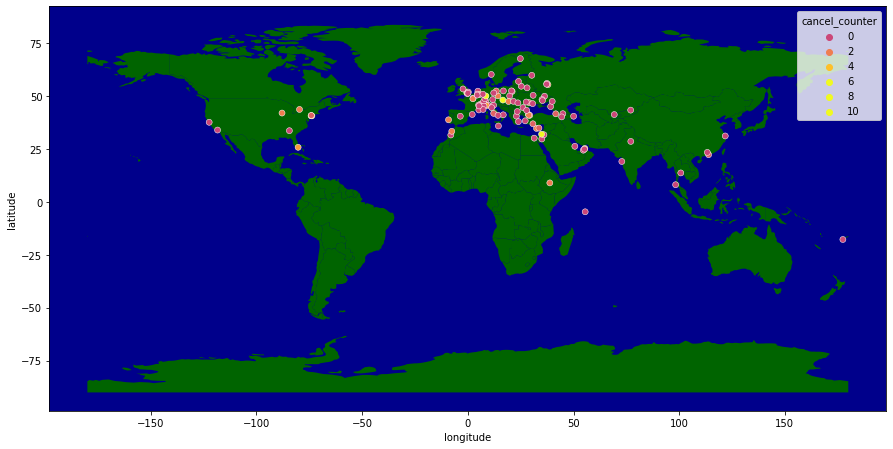

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor('DarkBlue')
countries.plot(color="darkgreen",ax=ax)
val = max(abs(df_lon['cancel_counter'].quantile(q=0.05)), abs(df_lon['cancel_counter'].quantile(q=0.95)))
sns.scatterplot(data=df_lon,x='longitude',y='latitude',hue='cancel_counter',hue_norm=(-val,val),palette="plasma", ax=ax)

In [36]:
all_df

,type,status,departure.icaoCode,departure.delay,departure.scheduledTime,departure.estimatedTime,departure.actualTime,departure.estimatedRunway,departure.actualRunway,arrival.iataCode,...,codeshared.airline.icaoCode,arrival.delay,arrival.baggage,R,new_sick_per_day,avg_for_7_days,longitude,latitude,cancel,Bad_Weather_today
0,arrival,landed,lebl,11.0,2021-12-04t20:55:00.000,2021-12-04t20:55:00.000,2021-12-04t21:05:00.000,2021-12-04t21:05:00.000,2021-12-04t21:05:00.000,tlv,...,ely,0.0,NaN,1.02,248,507,2.0783,41.2969,0,0
1,arrival,landed,lebl,11.0,2021-12-04t20:55:00.000,2021-12-04t20:55:00.000,2021-12-04t21:05:00.000,2021-12-04t21:05:00.000,2021-12-04t21:05:00.000,tlv,...,NaN,0.0,NaN,1.02,248,507,2.0783,41.2969,0,0
2,arrival,scheduled,lirf,0.0,2021-12-04t21:50:00.000,NaN,NaN,NaN,NaN,tlv,...,NaN,0.0,NaN,1.02,248,507,12.2389,41.8003,0,0
3,arrival,landed,omdb,14.0,2021-12-05t00:25:00.000,2021-12-05t00:40:00.000,2021-12-05t00:39:00.000,2021-12-05t00:39:00.000,2021-12-05t00:39:00.000,tlv,...,NaN,0.0,NaN,1.03,539,519,55.3644,25.2528,0,0
4,arrival,landed,eham,8.0,2021-12-04t20:55:00.000,2021-12-04t20:55:00.000,2021-12-04t21:02:00.000,2021-12-04t21:02:00.000,2021-12-04t21:02:00.000,tlv,...,klm,0.0,NaN,1.02,248,507,4.7642,52.3081,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,departure,active,llbg,7.0,2021-12-27t15:20:00.000,NaN,2021-12-27t15:26:00.000,2021-12-27t15:26:00.000,2021-12-27t15:26:00.000,bru,...,NaN,0.0,NaN,2.05,2976,1409,34.8856,32.0094,0,0
7778,departure,active,llbg,15.0,2021-12-27t20:20:00.000,2021-12-27t20:35:00.000,NaN,NaN,NaN,lej,...,NaN,0.0,NaN,2.05,2976,1409,34.8856,32.0094,0,0
7779,departure,active,llbg,11.0,2021-12-27t21:12:00.000,2021-12-27t21:27:00.000,2021-12-27t21:22:00.000,2021-12-27t21:22:00.000,2021-12-27t21:22:00.000,cgn,...,NaN,4.0,NaN,2.05,2976,1409,34.8856,32.0094,0,0
7780,departure,active,llbg,24.0,2021-12-27t22:05:00.000,2021-12-27t22:20:00.000,2021-12-27t22:29:00.000,2021-12-27t22:29:00.000,2021-12-27t22:29:00.000,saw,...,NaN,1.0,NaN,2.05,2976,1409,34.8856,32.0094,0,0


vialuztion for all of our data

In [37]:
df_contius=all_df[['Bad_Weather_today','new_sick_per_day','avg_for_7_days','longitude','latitude']]

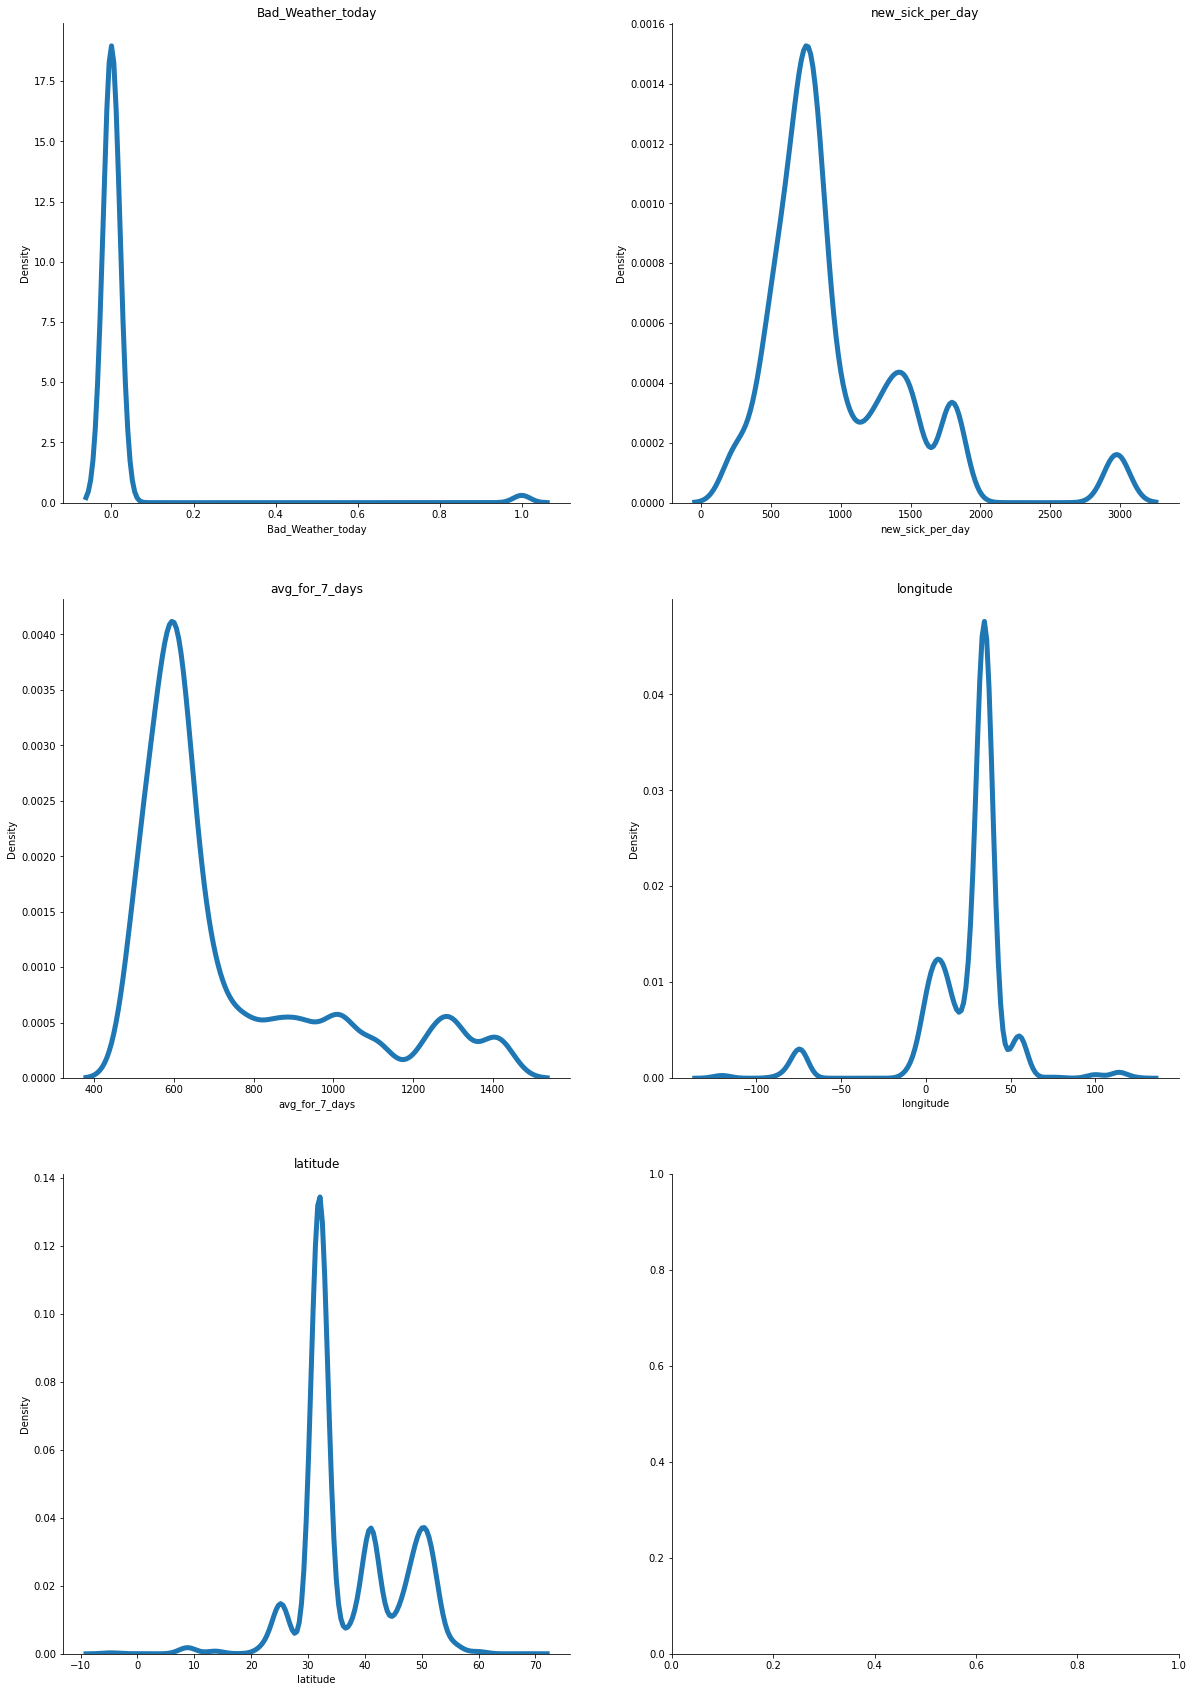

In [38]:
# sns.scatterplot(data=new_result,x='R',y='new_sick_per_day')
ig,axs=plt.subplots(3,2,figsize=(20,30))
axs = axs.ravel()
pd.set_option("display.max_columns",None)
for i, col in enumerate(df_contius):
    axs[i].set_title(col)
    sns.kdeplot(data = all_df[col], ax = axs[i], linewidth = 5)
    sns.despine()

In [39]:
all_df['cancel']=0
for i in range(len(all_df)):
    if all_df['status'][i]=='cancelled' or all_df['status'][i]=='diverted':
        all_df['cancel'][i]=1 
all_df['arrival.delay'].fillna(0,inplace=True)
all_df['departure.delay'].fillna(0,inplace=True)

checking for corletion

In [40]:
stats.pearsonr(all_df['arrival.delay'],all_df['R'] )

(-0.0010683843251121858, 0.9249239924255103)

Prepering data for machine learning

In [41]:
df=pd.DataFrame()
df=new_result.copy()
df.drop(['type', 'status','departure.icaoCode','departure.scheduledTime', 'departure.estimatedTime',
       'departure.actualTime', 'departure.estimatedRunway',
       'departure.actualRunway', 'arrival.iataCode', 'arrival.icaoCode',
       'arrival.scheduledTime', 'arrival.estimatedTime', 'arrival.actualTime',
       'arrival.estimatedRunway', 'arrival.actualRunway', 'airline.name',
       'codeshared.airline.icaoCode', 'arrival.baggage','avg_for_7_days',
       'longitude', 'latitude','departure.delay','arrival.delay','new_sick_per_day'],axis=1,inplace=True)

Checking for the best SEED

In [ ]:
scaler = StandardScaler()
max1=0
max2=0
max3=0
j=0
for i in range(1000000):
    xtrain,xtest,ytrain,ytest=train_test_split(df.drop('cancel',axis=1),df['cancel'],random_state=i)
    model= LogisticRegression(max_iter=100 )
    model.fit(xtrain,ytrain)
    acc=model.score(xtest,ytest)
    ypred=model.predict(xtest)
    cnf_matrix = metrics.confusion_matrix(ytest, ypred)
    if  max3 < metrics.recall_score(ytest, ypred):
        max1 = metrics.accuracy_score(ytest, ypred)
        max2 = metrics.precision_score(ytest, ypred)
        max3 = metrics.recall_score(ytest, ypred)
        print(metrics.recall_score(ytest, ypred))
        j=i
        print(j)
print("Accuracy:",max1)
print("Precision:",max2)
print("Recall:",max3)
print(j)

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('cancel',axis=1),df['cancel'],random_state=293488)
  

Creating Model

In [43]:
model= LogisticRegression(max_iter=100)
model.fit(xtrain,ytrain)
acc=model.score(xtest,ytest)
ypred=model.predict(xtest)
print(f"accuracy is {acc}")

accuracy is 0.987667009249743


Checking our Accuracy,Precision,Recall

In [44]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))
print("Precision:",metrics.precision_score(ytest, ypred))
print("Recall:",metrics.recall_score(ytest, ypred))

Accuracy: 0.987667009249743
Precision: 1.0
Recall: 0.4418604651162791


Creating Roc Curve

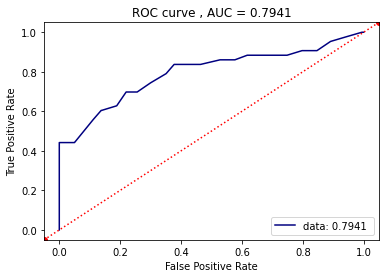

In [45]:
y_pred_proba = model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
aucmean=auc.mean()
plt.plot(fpr,tpr,label="data: %.4f "%auc,color ='navy')
plt.axline([0, 0],slope=1,color='Red',ls=':',marker='o')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve , AUC = %.4f'%auc)
plt.show()

Total Report for our classification

In [46]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1903
           1       1.00      0.44      0.61        43

    accuracy                           0.99      1946
   macro avg       0.99      0.72      0.80      1946
weighted avg       0.99      0.99      0.99      1946



Histograms

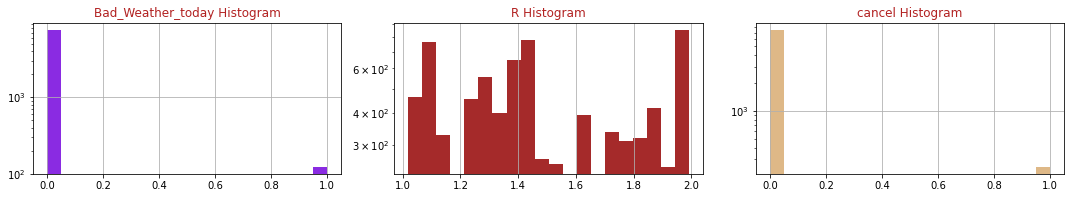

In [47]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

Creating a plot for two different machine learning models "Random Forest" vs. "Logistic Regression"

In [48]:
models = {}
models['Logistic Regression'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()

In [49]:

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    models[key].fit(xtrain, ytrain)
    predictions = models[key].predict(xtest)
    accuracy[key] = metrics.accuracy_score(ytest, ypred)
    precision[key] = metrics.precision_score(ytest, ypred)
    recall[key] = metrics.recall_score(ytest, ypred)

In [50]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.987667,1.0,0.44186
Random Forest,0.987667,1.0,0.44186


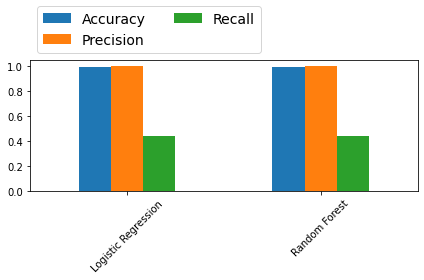

In [51]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

Checking the prediction of our data

In [52]:
R=2.8
bad_weather=0
if model.predict(np.array([[bad_weather,R]]))[0]==1:
    print("The flight is going to cancel")
else:
    print("The flight is NOT going to cancel")

The flight is going to cancel


Making a comperisent of two differnt machine learning models "Random Forest" vs. "Logistic Regression"

In [53]:
kf= KFold(n_splits=2)
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [54]:
def get_score(model1,xtrain,xtest,ytrain,ytest):
    model1.fit(xtrain,ytrain)
    return model.score(xtest,ytest)


In [55]:
scores_l=[]
scores_rf=[]
for train_index,test_index in kf.split(df):
    scores_l.append(get_score(LogisticRegression(),xtrain,xtest,ytrain,ytest))
    scores_rf.append(get_score(RandomForestClassifier(),xtrain,xtest,ytrain,ytest))

In [56]:
print(scores_l)
print(scores_rf)

[0.987667009249743, 0.987667009249743]
[0.987667009249743, 0.987667009249743]


# Hope you enjoyed :)